## tensorflow 설치

In [1]:
!pip install --user --upgrade tensorflow

## 설치 확인

In [2]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000,1000])))

tf.Tensor(-1303.6606, shape=(), dtype=float32)


## numpy  
[ ]수로 차원 파악

In [3]:
import numpy as np

a = np.array([1,2,3,4]) + np.array([1,3,5,6])
print(type(a))
print(a.ndim)
x = np.array(12)
print(x.ndim)
y = np.array([12])
print(y.ndim)
z = np.array([[10],[10]])
print(z.ndim)
az = np.array([[[[10],[10]]]])
print(az.ndim)

<class 'numpy.ndarray'>
1
0
1
2
4


In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images.dtype

dtype('uint8')

In [8]:
digit = train_images[4]

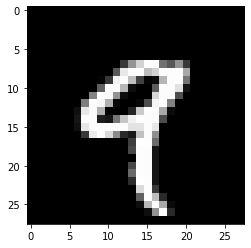

In [9]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')
plt.show()

In [10]:
my_slice = train_images[11:101]
my_slice.shape

(90, 28, 28)

In [11]:
#오른쪽 하단부
my_slice = train_images[:10,14:,14:]
my_slice.shape

(10, 14, 14)

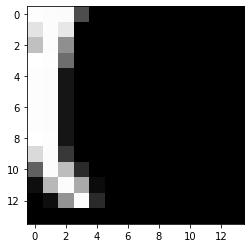

In [12]:
plt.imshow(my_slice[4], cmap='gray')
plt.show()

## 배치 데이터

In [13]:
batch = train_images[:128]

In [14]:
batch = train_images[128:256]

In [15]:
# n번째 배치
n=1
batch = train_images[128*n:128*(n+1)]

### 2차원: 벡터 데이터  
(samples, features)  
### 3차원: 시계열 데이터, sequence data  
(samples, timesteps, features)  
### 4차원: 영상  
(samples, height, width, channels), (samples, channels,height, width)  
channel last (128, 256, 256, 3) --> tensorflow / channels 0: gray, 3: color  
channel first (128, 3, 256, 256) --> pytorch, Theano  
channel first or last  
### 5차원: 동영상  
(samples, frames, height, width, channels)  
(4, 240, 144, 256, 3)

## 회귀 분석  
y = wx에서 최적의 w를 찾는 것  


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [17]:
공부시간 = np.array([1,2,3,4,5,6])
점수     = np.array([10,21,30,40,51,60])

In [18]:
model = Sequential()
# 출력값 하나, 입력값 하나, 활성화함수는 linear
model.add(Dense(1, input_dim = 1, activation = 'linear'))

In [19]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [20]:
model.fit(공부시간, 점수, epochs = 100, batch_size=1, shuffle=False)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 326.7960 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.6570 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9265 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9002 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8061 - accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.0000e+00
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.0000e+00
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.00

In [21]:
print('예측결과:', model.predict([7]))
print('파라미터수:',model.count_params())

예측결과: [[70.05347]]
파라미터수: 2


In [22]:
from tensorflow.keras.datasets import boston_housing

In [74]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [75]:
train_data.shape

(404, 13)

batch size는 한 번의 batch마다 주는 데이터 샘플의 size. 여기서 batch는 나눠진 데이터 셋을 뜻하며  
iteration는 epoch를 나누어서 실행하는 횟수라고 생각하면 됨.  

ex) 전체 2000 개의 데이터가 있고, epochs = 20, batch_size = 500이라고 가정  
전체 데이터셋에 대해서는 20 번의 학습이 이루어졌으며, iteration 기준으로 보자면 총 80 번의 학습이 이루어진 것

In [76]:
model = Sequential()
model.add(Dense(64, activation = 'linear',input_shape=(train_data.shape[1],)))
model.add(Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(1))
# otms = optimizers.SGD(learning_rate=0.01)
# otms = optimizers.Adagrad(learning_rate=0.01)
# otms = optimizers.Adamax(learning_rate=0.01)
# otms = optimizers.Ftrl(learning_rate=0.01)
# otms = optimizers.Nadam(learning_rate=0.01)
otms = optimizers.RMSprop(learning_rate=0.01)
# otms = optimizers.Adadelta(learning_rate=0.01)
model.compile(optimizer=otms, loss='mse', metrics=['accuracy'])

### 데이터 스케일링

In [77]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [73]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [44]:
train_data.mean()

1.6911241806933077e-17

In [45]:
train_data.std()

1.0000000000000007

In [56]:
model.fit(train_data, train_targets, epochs = 100, batch_size=50, shuffle=False)

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 7.9723 - accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 7.0264 - accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 7.0207 - accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 8.1240 - accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 6.6742 - accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 6.9395 - accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 6.7552 - accuracy: 0.0000e+00
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 7.1901 - accuracy: 0.0000e+00
Epoch 9/100
9/9 [==============================] - ETA: 0s - loss: 15.4882 - accuracy: 0.0000e+0 - 0s 3ms/step - loss: 7.8515 - accuracy: 0.0000e+00
Epoch 10/100
9/9 [=========================

9/9 [==============================] - 0s 2ms/step - loss: 6.5018 - accuracy: 0.0000e+00
Epoch 81/100
9/9 [==============================] - 0s 2ms/step - loss: 5.7346 - accuracy: 0.0000e+00
Epoch 82/100
9/9 [==============================] - 0s 2ms/step - loss: 5.8711 - accuracy: 0.0000e+00
Epoch 83/100
9/9 [==============================] - 0s 2ms/step - loss: 5.7248 - accuracy: 0.0000e+00
Epoch 84/100
9/9 [==============================] - 0s 2ms/step - loss: 5.5620 - accuracy: 0.0000e+00
Epoch 85/100
9/9 [==============================] - 0s 3ms/step - loss: 6.1562 - accuracy: 0.0000e+00
Epoch 86/100
9/9 [==============================] - 0s 3ms/step - loss: 6.1045 - accuracy: 0.0000e+00
Epoch 87/100
9/9 [==============================] - 0s 3ms/step - loss: 5.9072 - accuracy: 0.0000e+00
Epoch 88/100
9/9 [==============================] - 0s 3ms/step - loss: 6.2014 - accuracy: 0.0000e+00
Epoch 89/100
9/9 [==============================] - 0s 3ms/step - loss: 6.0592 - accuracy: 0.00

In [51]:
model.evaluate(test_data, test_targets, verbose=0)

[15.570816040039062, 0.0]

In [52]:
print('예측결과:\n', model.predict(test_data))
print('파라미터수:',model.count_params())

예측결과:
 [[ 9.693916 ]
 [18.763031 ]
 [23.073418 ]
 [33.704704 ]
 [24.723879 ]
 [21.441786 ]
 [25.664976 ]
 [22.19505  ]
 [23.753119 ]
 [21.218275 ]
 [28.0693   ]
 [17.259684 ]
 [17.035765 ]
 [42.064754 ]
 [19.156136 ]
 [21.255426 ]
 [26.586449 ]
 [21.635107 ]
 [21.45815  ]
 [22.723608 ]
 [12.175655 ]
 [16.155453 ]
 [22.646507 ]
 [15.241297 ]
 [18.54656  ]
 [22.968058 ]
 [29.372705 ]
 [21.672756 ]
 [12.990547 ]
 [21.028673 ]
 [20.832977 ]
 [15.097372 ]
 [35.81354  ]
 [25.915989 ]
 [17.601486 ]
 [ 9.845522 ]
 [18.237785 ]
 [22.977606 ]
 [20.1093   ]
 [22.274035 ]
 [22.594742 ]
 [27.292854 ]
 [17.014818 ]
 [40.118313 ]
 [25.93839  ]
 [25.15645  ]
 [26.14053  ]
 [19.170883 ]
 [24.04947  ]
 [24.261667 ]
 [28.71684  ]
 [22.739119 ]
 [10.915131 ]
 [16.687847 ]
 [32.82475  ]
 [26.04895  ]
 [13.990076 ]
 [45.94416  ]
 [38.990852 ]
 [22.670746 ]
 [19.987797 ]
 [16.533289 ]
 [15.098366 ]
 [20.444399 ]
 [23.704    ]
 [21.384764 ]
 [14.848986 ]
 [22.356611 ]
 [10.4927025]
 [10.647711 ]
 [20.582718 ]

In [60]:
def build_model():
    model = Sequential()
    model.add(Dense(1, input_dim=train_data.shape[1], activation='linear'))
    model.compile(optimizer='nadam', loss='mse',metrics=['accuracy'])
    return model

In [90]:
# 교차 검증  
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k): # i = [0, 1, 2, 3]   
    print('처리중인 폴드:',i+1 )
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([
                                    train_data[:i*num_val_samples],
                                    train_data[(i+1)*num_val_samples:]
                                        ])
    partial_train_targets = np.concatenate([
                                    train_targets[:i*num_val_samples],
                                    train_targets[(i+1)*num_val_samples:]
                                        ])
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 10)
    
    val_mse, accuracy = model.evaluate(val_data, val_targets)
    all_scores.append(val_mse)
    print('all_scores:', val_mse)
    

처리중인 폴드: 1
Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 620.2601 - accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 616.3253 - accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 612.3281 - accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 608.3592 - accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 604.5323 - accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 600.8737 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 597.4096 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 593.8534 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 590.3112 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [========================

31/31 [==============================] - 0s 2ms/step - loss: 448.3596 - accuracy: 0.0000e+00
Epoch 79/100
31/31 [==============================] - 0s 2ms/step - loss: 446.9389 - accuracy: 0.0000e+00
Epoch 80/100
31/31 [==============================] - 0s 2ms/step - loss: 445.5385 - accuracy: 0.0000e+00
Epoch 81/100
31/31 [==============================] - 0s 2ms/step - loss: 444.1043 - accuracy: 0.0000e+00
Epoch 82/100
31/31 [==============================] - 0s 2ms/step - loss: 442.6786 - accuracy: 0.0000e+00
Epoch 83/100
31/31 [==============================] - 0s 2ms/step - loss: 441.2641 - accuracy: 0.0000e+00
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 439.8263 - accuracy: 0.0000e+00
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 438.4200 - accuracy: 0.0000e+00
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 436.9785 - accuracy: 0.0000e+00
Epoch 87/100
31/31 [==============================] - 0s 2m

31/31 [==============================] - 0s 2ms/step - loss: 486.3855 - accuracy: 0.0000e+00
Epoch 55/100
31/31 [==============================] - 0s 2ms/step - loss: 484.7541 - accuracy: 0.0000e+00
Epoch 56/100
31/31 [==============================] - 0s 2ms/step - loss: 483.2572 - accuracy: 0.0000e+00
Epoch 57/100
31/31 [==============================] - 0s 2ms/step - loss: 481.7246 - accuracy: 0.0000e+00
Epoch 58/100
31/31 [==============================] - 0s 2ms/step - loss: 480.2063 - accuracy: 0.0000e+00
Epoch 59/100
31/31 [==============================] - 0s 2ms/step - loss: 478.6925 - accuracy: 0.0000e+00
Epoch 60/100
31/31 [==============================] - 0s 2ms/step - loss: 477.1927 - accuracy: 0.0000e+00
Epoch 61/100
31/31 [==============================] - 0s 2ms/step - loss: 475.7091 - accuracy: 0.0000e+00
Epoch 62/100
31/31 [==============================] - 0s 1ms/step - loss: 474.1985 - accuracy: 0.0000e+00
Epoch 63/100
31/31 [==============================] - 0s 1m

31/31 [==============================] - 0s 2ms/step - loss: 541.5204 - accuracy: 0.0000e+00
Epoch 31/100
31/31 [==============================] - 0s 1ms/step - loss: 539.2455 - accuracy: 0.0000e+00
Epoch 32/100
31/31 [==============================] - 0s 2ms/step - loss: 536.8760 - accuracy: 0.0000e+00
Epoch 33/100
31/31 [==============================] - 0s 2ms/step - loss: 534.5266 - accuracy: 0.0000e+00
Epoch 34/100
31/31 [==============================] - 0s 2ms/step - loss: 532.3219 - accuracy: 0.0000e+00
Epoch 35/100
31/31 [==============================] - 0s 1ms/step - loss: 530.0527 - accuracy: 0.0000e+00
Epoch 36/100
31/31 [==============================] - 0s 2ms/step - loss: 527.9055 - accuracy: 0.0000e+00
Epoch 37/100
31/31 [==============================] - 0s 1ms/step - loss: 525.8278 - accuracy: 0.0000e+00
Epoch 38/100
31/31 [==============================] - 0s 1ms/step - loss: 523.7430 - accuracy: 0.0000e+00
Epoch 39/100
31/31 [==============================] - 0s 1m

Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 557.0527 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 554.0353 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 551.1376 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 548.3099 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 545.3649 - accuracy: 0.0000e+00
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 542.6235 - accuracy: 0.0000e+00
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 539.9828 - accuracy: 0.0000e+00
Epoch 13/100
31/31 [==============================] - 0s 2ms/step - loss: 537.3703 - accuracy: 0.0000e+00
Epoch 14/100
31/31 [==============================] - 0s 2ms/step - loss: 534.8805 - accuracy: 0.0000e+00
Epoch 15/100
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 420.4128 - accuracy: 0.0000e+00
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 419.1226 - accuracy: 0.0000e+00
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 417.8039 - accuracy: 0.0000e+00
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 416.5244 - accuracy: 0.0000e+00
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 415.2319 - accuracy: 0.0000e+00
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 413.9919 - accuracy: 0.0000e+00
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 412.6926 - accuracy: 0.0000e+00
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 411.4675 - accuracy: 0.0000e+00
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 410.1529 - accuracy: 0.0000e+00
Epoch 92/100
31/31 [==============================] - 0s 2m

In [88]:
np.mean(all_scores)

425.7576217651367

In [89]:
model.evaluate(test_data, test_targets, batch_size = 10)

11/11 [==============================] - 0s 1ms/step - loss: 436.1953 - accuracy: 0.0000e+00


[436.1953430175781, 0.0]

In [108]:
from tensorflow.keras import regularizers

In [109]:
def build_model():
    model = Sequential()
    model.add(Dense(1, input_dim=train_data.shape[1], activation='linear', kernel_regularizer = regularizers.l2(0.001)))
    model.compile(optimizer='nadam', loss='mse',metrics=['accuracy'])
    return model

In [110]:
# 교차 검증  
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k): # i = [0, 1, 2, 3]   
    print('처리중인 폴드:',i+1 )
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([
                                    train_data[:i*num_val_samples],
                                    train_data[(i+1)*num_val_samples:]
                                        ])
    partial_train_targets = np.concatenate([
                                    train_targets[:i*num_val_samples],
                                    train_targets[(i+1)*num_val_samples:]
                                        ])
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 10)
    
    val_mse, accuracy = model.evaluate(val_data, val_targets)
    all_scores.append(val_mse)
    print('all_scores:', val_mse)

처리중인 폴드: 1
Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 606.7687 - accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 603.3165 - accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 599.9065 - accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 596.4574 - accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 593.1208 - accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 589.9061 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 586.8242 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 583.8263 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 580.7714 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [========================

31/31 [==============================] - 0s 3ms/step - loss: 448.6339 - accuracy: 0.0000e+00
Epoch 79/100
31/31 [==============================] - 0s 3ms/step - loss: 447.2409 - accuracy: 0.0000e+00
Epoch 80/100
31/31 [==============================] - 0s 1ms/step - loss: 445.8061 - accuracy: 0.0000e+00
Epoch 81/100
31/31 [==============================] - 0s 2ms/step - loss: 444.4199 - accuracy: 0.0000e+00
Epoch 82/100
31/31 [==============================] - 0s 2ms/step - loss: 442.9808 - accuracy: 0.0000e+00
Epoch 83/100
31/31 [==============================] - 0s 3ms/step - loss: 441.5850 - accuracy: 0.0000e+00
Epoch 84/100
31/31 [==============================] - 0s 3ms/step - loss: 440.1495 - accuracy: 0.0000e+00
Epoch 85/100
31/31 [==============================] - 0s 3ms/step - loss: 438.7439 - accuracy: 0.0000e+00
Epoch 86/100
31/31 [==============================] - 0s 3ms/step - loss: 437.3714 - accuracy: 0.0000e+00
Epoch 87/100
31/31 [==============================] - 0s 3m

31/31 [==============================] - 0s 4ms/step - loss: 500.1934 - accuracy: 0.0000e+00
Epoch 55/100
31/31 [==============================] - 0s 2ms/step - loss: 498.5773 - accuracy: 0.0000e+00
Epoch 56/100
31/31 [==============================] - 0s 2ms/step - loss: 496.9674 - accuracy: 0.0000e+00
Epoch 57/100
31/31 [==============================] - 0s 2ms/step - loss: 495.3247 - accuracy: 0.0000e+00
Epoch 58/100
31/31 [==============================] - 0s 2ms/step - loss: 493.7107 - accuracy: 0.0000e+00
Epoch 59/100
31/31 [==============================] - 0s 2ms/step - loss: 492.1714 - accuracy: 0.0000e+00
Epoch 60/100
31/31 [==============================] - 0s 2ms/step - loss: 490.5339 - accuracy: 0.0000e+00
Epoch 61/100
31/31 [==============================] - 0s 3ms/step - loss: 488.9374 - accuracy: 0.0000e+00
Epoch 62/100
31/31 [==============================] - 0s 3ms/step - loss: 487.3484 - accuracy: 0.0000e+00
Epoch 63/100
31/31 [==============================] - 0s 4m

31/31 [==============================] - 0s 2ms/step - loss: 521.0358 - accuracy: 0.0000e+00
Epoch 31/100
31/31 [==============================] - 0s 2ms/step - loss: 519.1741 - accuracy: 0.0000e+00
Epoch 32/100
31/31 [==============================] - 0s 2ms/step - loss: 517.3961 - accuracy: 0.0000e+00
Epoch 33/100
31/31 [==============================] - 0s 4ms/step - loss: 515.6516 - accuracy: 0.0000e+00
Epoch 34/100
31/31 [==============================] - 0s 3ms/step - loss: 513.9180 - accuracy: 0.0000e+00
Epoch 35/100
31/31 [==============================] - 0s 2ms/step - loss: 512.0992 - accuracy: 0.0000e+00
Epoch 36/100
31/31 [==============================] - 0s 2ms/step - loss: 510.3820 - accuracy: 0.0000e+00
Epoch 37/100
31/31 [==============================] - 0s 2ms/step - loss: 508.7295 - accuracy: 0.0000e+00
Epoch 38/100
31/31 [==============================] - 0s 3ms/step - loss: 506.9702 - accuracy: 0.0000e+00
Epoch 39/100
31/31 [==============================] - 0s 2m

31/31 [==============================] - 0s 1ms/step - loss: 531.9704 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 529.9430 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 527.9474 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 525.9343 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 524.0197 - accuracy: 0.0000e+00
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 522.1125 - accuracy: 0.0000e+00
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 520.2155 - accuracy: 0.0000e+00
Epoch 13/100
31/31 [==============================] - 0s 3ms/step - loss: 518.3737 - accuracy: 0.0000e+00
Epoch 14/100
31/31 [==============================] - 0s 3ms/step - loss: 516.5154 - accuracy: 0.0000e+00
Epoch 15/100
31/31 [==============================] - 0s 4ms/s

31/31 [==============================] - 0s 3ms/step - loss: 417.3058 - accuracy: 0.0000e+00
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 415.9785 - accuracy: 0.0000e+00
Epoch 85/100
31/31 [==============================] - 0s 1ms/step - loss: 414.7484 - accuracy: 0.0000e+00
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 413.5288 - accuracy: 0.0000e+00
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 412.2783 - accuracy: 0.0000e+00
Epoch 88/100
31/31 [==============================] - 0s 3ms/step - loss: 410.9981 - accuracy: 0.0000e+00
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 409.7165 - accuracy: 0.0000e+00
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 408.4953 - accuracy: 0.0000e+00
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 407.2480 - accuracy: 0.0000e+00
Epoch 92/100
31/31 [==============================] - 0s 2m

In [111]:
np.mean(all_scores)

423.98404693603516

In [112]:
model.evaluate(test_data, test_targets, batch_size = 10)

11/11 [==============================] - 0s 1ms/step - loss: 426.2105 - accuracy: 0.0000e+00


[426.21051025390625, 0.0]

In [ ]:
model.add(Dense(4, input_dim=train_data.shape[1], activation=''))

In [117]:
# x는 input layer에서 나온 데이터라는 것을 가정
x = np.array([-30, -25, -20, -15, -5, 0, 5, 10, 15, 20, 25, 30])
# y는 sigmod function에 의해 분리된 결과라고 가정 
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,1])

In [121]:
model = Sequential()
model.add(Dense(1, input_dim = 1,activation='sigmoid'))
opt = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(x, y, epochs=num_epochs, batch_size = 12)


Epoch 1/100
1/1 [==============================] - 0s 261ms/step - loss: 27.2704 - binary_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 27.1025 - binary_accuracy: 0.0833
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 26.9346 - binary_accuracy: 0.0833
Epoch 4/100
1/1 [==============================] - 0s 999us/step - loss: 26.7667 - binary_accuracy: 0.0833
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 26.5988 - binary_accuracy: 0.0833
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 26.4309 - binary_accuracy: 0.0833
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 26.2629 - binary_accuracy: 0.0833
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 26.0950 - binary_accuracy: 0.0833
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 25.9272 - binary_accuracy: 0.0833
Epoch 10/100
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 14.3523 - binary_accuracy: 0.0833
Epoch 79/100
1/1 [==============================] - 0s 996us/step - loss: 14.1849 - binary_accuracy: 0.0833
Epoch 80/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0174 - binary_accuracy: 0.0833
Epoch 81/100
1/1 [==============================] - 0s 997us/step - loss: 13.8500 - binary_accuracy: 0.0833
Epoch 82/100
1/1 [==============================] - 0s 3ms/step - loss: 13.6825 - binary_accuracy: 0.0833
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5151 - binary_accuracy: 0.0833
Epoch 84/100
1/1 [==============================] - 0s 997us/step - loss: 13.3478 - binary_accuracy: 0.0833
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1804 - binary_accuracy: 0.0833
Epoch 86/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0131 - binary_accuracy: 0.0833
Epoch 87/100
1/1 [==============================] - 0

In [122]:
model.count_params()

2